<a href="https://colab.research.google.com/github/ishandahal/stats453-deep_learning_torch/blob/main/Regularization/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
import torchvision
import random
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import PIL
import matplotlib.pyplot as plt

In [2]:
## Settings 

random_seed = 1
batch_size = 128
num_epochs = 100

## MNIST DATASET

# note: transforms.ToTensor() scales image to 0-1 range

training_transforms = torchvision.transforms.Compose([
        # torchvision.transforms.RandomRotation(degrees=20),
        # torchvision.transforms.Resize(size=(34, 34)),
        # torchvision.transforms.RandomCrop(size=(28, 28)),
        torchvision.transforms.RandomAffine(degrees=(-20, 20),
                                            translate=(0.15, 0.15),
                                            resample=PIL.Image.BILINEAR),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,))
        # normalize dones (x_i - mean) / std
        # if images are 0 to 1, they will be [-1, 1] afterwards
])

test_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=training_transforms,
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=test_transforms)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Image batch dimensions:  torch.Size([128, 1, 28, 28])
Label dimensions:  torch.Size([128])


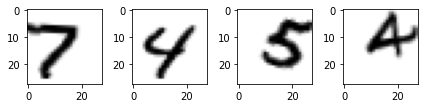

In [6]:
random.seed(123)
torch.manual_seed(123)

for image, label in train_loader:
    print('Image batch dimensions: ', image.size())
    print('Label dimensions: ', label.size())
    break

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(image[i].view(28, 28).numpy(), cmap='binary')

plt.tight_layout()

Comparing to without augmentation

Image batch dimensions:  torch.Size([128, 1, 28, 28])
Label dimensions:  torch.Size([128])


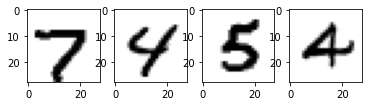

In [8]:
random.seed(123)
torch.manual_seed(123)

train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=torchvision.transforms.ToTensor(),
                               download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

for images, labels in train_loader:
    print('Image batch dimensions: ', image.size())
    print('Label dimensions: ', label.size())
    break

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(images[i].view(28, 28).numpy(), cmap='binary')